
### <font color='blue'> PROBLEM STATEMENT : </font>

* To predict the generation of power of the given plan in this duration: October 1st, 2019 to October 27th, 2019. 


### <font color='green'>File1:  power_actual</font>

1. This file contains the solar generation of a certain plant from October 1st, 2017 to September 30th, 2019.
2. You'll find the following columns: 'power', 'gti' and 'ghi'. Power is the actual power generated while GHI (Global Horizontal Irradiance) and GTI (Global Tilt Irradiance) are the parameters relevant to the that define the radiation received from the sun.

### <font color='green'>File2: weather_actuals</font>
1. This file contains the weather data of the same plant from October 1st, 2017 to September 30th, 2019.
2. The columns' names are self-explanatory.


### <font color='green'>File3: weather_forecast</font>
1. This file contains the weather data from October 1st, 2019 to October 27th, 2019. 




In [2]:
import pandas as pd
import glob



pd.options.display.max_columns = 250
pd.options.display.max_rows = 2000
pd.options.display.float_format = '{:.2f}'.format





import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6



Matplotlib is building the font cache; this may take a moment.


In [4]:
# glob.glob("*.csv")

In [74]:
power_actual = pd.read_csv("power_actual.csv",parse_dates= True, index_col=0)

weather_actuals = pd.read_csv("weather_actuals.csv",parse_dates=[0], index_col=0)

weather_forecast = pd.read_csv("weather_forecast.csv",parse_dates=[0], index_col=0)

In [27]:
power_actual.shape, weather_actuals.shape, weather_forecast.shape

((70080, 4), (13619, 30), (648, 30))

In [28]:
power_actual.columns.to_list()

['datetime', 'ghi', 'gti', 'power']

In [29]:
weather_actuals.columns

Index(['plant_id', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust', 'heat_index',
       'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode', 'ozone',
       'precip_accumulation', 'precip_intensity', 'precip_probability',
       'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at'],
      dtype='object')

In [30]:
weather_forecast.columns

Index(['plant_id', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust', 'heat_index',
       'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode', 'ozone',
       'precip_accumulation', 'precip_intensity', 'precip_probability',
       'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at'],
      dtype='object')

In [31]:
power_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70080 entries, 0 to 70079
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  70080 non-null  object 
 1   ghi       35040 non-null  float64
 2   gti       35040 non-null  float64
 3   power     70080 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.7+ MB


In [32]:
power_actual.head()

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.00,0.00,0.00
1,2017-10-01 00:15:00,0.00,0.00,0.00
2,2017-10-01 00:30:00,0.00,0.00,0.00
3,2017-10-01 00:45:00,0.00,0.00,0.00
4,2017-10-01 01:00:00,0.00,0.00,0.00


In [33]:
power_actual[power_actual.gti == 0.00].shape

(35040, 4)

In [34]:
# weather_actuals.head()

In [35]:
# weather_forecast.head()

In [36]:
power_actual.isnull().sum()

datetime        0
ghi         35040
gti         35040
power           0
dtype: int64

In [37]:

print(round(100*(power_actual.isnull().sum()/len(power_actual.index)), 2).sort_values(ascending=False))

gti        50.00
ghi        50.00
power       0.00
datetime    0.00
dtype: float64


In [38]:

print(round(100*(weather_actuals.isnull().sum()/len(weather_actuals.index)), 2).sort_values(ascending=False))

qpf                    72.51
fctcode                72.51
wind_chill             72.51
snow                   72.51
pop                    72.51
precip_accumulation    72.51
heat_index             72.51
precip_type            52.35
temperature             0.00
humidity                0.00
wind_gust               0.00
dew_point               0.00
apparent_temperature    0.00
cloud_cover             0.00
datetime_local          0.00
wind_bearing            0.00
wind_speed              0.00
datetime_utc            0.00
updated_at              0.00
pressure                0.00
summary                 0.00
uv_index                0.00
ozone                   0.00
precip_intensity        0.00
precip_probability      0.00
visibility              0.00
sunrise                 0.00
sunset                  0.00
icon                    0.00
plant_id                0.00
dtype: float64


In [39]:

print(round(100*(weather_forecast.isnull().sum()/len(weather_forecast.index)), 2).sort_values(ascending=False))

qpf                    100.00
fctcode                100.00
wind_chill             100.00
snow                   100.00
pop                    100.00
precip_accumulation    100.00
heat_index             100.00
precip_type             82.41
temperature              0.00
humidity                 0.00
wind_gust                0.00
dew_point                0.00
apparent_temperature     0.00
cloud_cover              0.00
datetime_local           0.00
wind_bearing             0.00
wind_speed               0.00
datetime_utc             0.00
updated_at               0.00
pressure                 0.00
summary                  0.00
uv_index                 0.00
ozone                    0.00
precip_intensity         0.00
precip_probability       0.00
visibility               0.00
sunrise                  0.00
sunset                   0.00
icon                     0.00
plant_id                 0.00
dtype: float64


### <font color='blue'>Data Preprocessing : Power Actual</font>



In [89]:
df = power_actual.copy()
df1 = weather_actuals.copy()
df2 = weather_forecast.copy()


df.head()

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.00,0.00,0.00
1,2017-10-01 00:15:00,0.00,0.00,0.00
2,2017-10-01 00:30:00,0.00,0.00,0.00
3,2017-10-01 00:45:00,0.00,0.00,0.00
4,2017-10-01 01:00:00,0.00,0.00,0.00


In [90]:
df.describe()

,ghi,gti,power
count,35040.00,35040.00,70080.00
mean,0.00,0.00,28.61
std,0.00,0.00,498.80
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,5.54
max,0.00,0.00,16172.04


ghi and gti : no giving more info, we shall drop it.

In [91]:
df["ghi"] = df["ghi"].fillna(0.00)
df["gti"] = df["gti"].fillna(0.00)

In [92]:
df.head(2)

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.00,0.00,0.00
1,2017-10-01 00:15:00,0.00,0.00,0.00


In [93]:
df.shape, df1.shape, df2.shape

((70080, 4), (13619, 30), (648, 30))

In [94]:
# df1.head()

In [95]:
# df1.info()

In [96]:
# df1.describe()

In [97]:
df.head(2)

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.00,0.00,0.00
1,2017-10-01 00:15:00,0.00,0.00,0.00


In [98]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [99]:
df.head(2)

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.00,0.00,0.00
1,2017-10-01 00:15:00,0.00,0.00,0.00


In [100]:
df["Day"] = df["datetime"].dt.day
df["Week"] = df["datetime"].dt.week
df["Month"] = df["datetime"].dt.month
df["Year"] = df["datetime"].dt.year

In [101]:
df.tail()

,datetime,ghi,gti,power,Day,Week,Month,Year
70075,2019-09-30 22:45:00,0.00,0.00,0.00,30,40,9,2019
70076,2019-09-30 23:00:00,0.00,0.00,0.00,30,40,9,2019
70077,2019-09-30 23:15:00,0.00,0.00,0.00,30,40,9,2019
70078,2019-09-30 23:30:00,0.00,0.00,0.00,30,40,9,2019
70079,2019-09-30 23:45:00,0.00,0.00,0.00,30,40,9,2019


In [109]:
df1.head()

,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,0.83,-9999.00,-9999.00,-9999.00,1007.90,-9999.00,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,0.45,-9999.00,-9999.00,-9999.00,1008.12,-9999.00,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


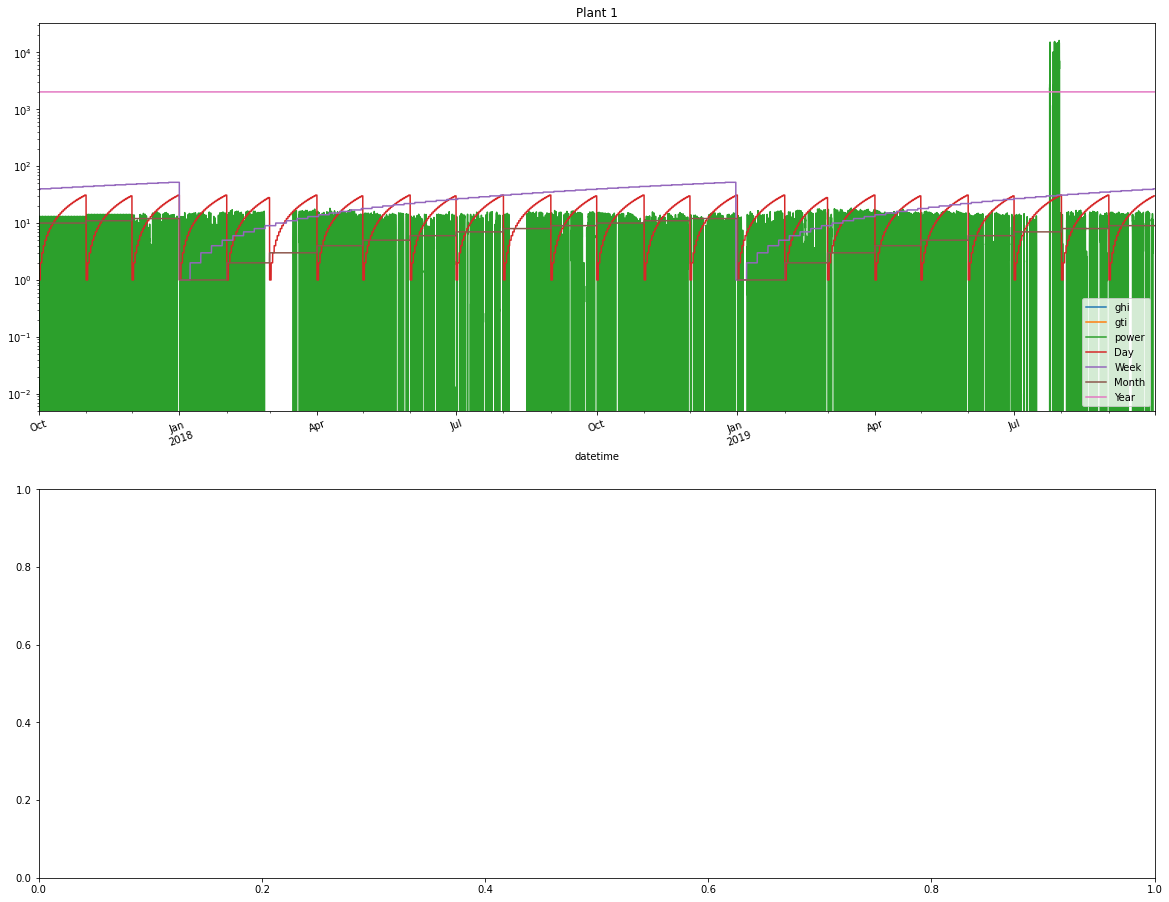

In [111]:
fig, axes = plt.subplots(nrows = 2, sharex=False, figsize=(20, 5))
fig.subplots_adjust(top = 2.5)
ax = df.plot(x = 'datetime', logy = True, title = 'Plant 1', rot = 20, ax = axes[0]); 
